### Imports

In [68]:
from src.methods import (SafeLevelSmote,BorderlineSMOTE,OneSidedSelection)
from src.c45 import C45
import pandas as pd
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

### Calculate performance metrics based on C4.5 classification

In [69]:
def score_data(x: np.array, y: np.array, cv=5) -> pd.DataFrame:
	clf = C45()
	y_pred = cross_val_predict(clf, x, y, cv=cv)
	return pd.DataFrame(classification_report(y,y_pred,output_dict=True))

In [70]:
def visualize_points(X, y) -> None:
    c =['tab:orange' if i ==1 else "tab:blue" for i in y]
    plt.scatter(X[:, 0], X[:, 1], c=c)
    plt.show()

### Datasets

#### Dummy dataset

Counter({0: 990, 1: 10})


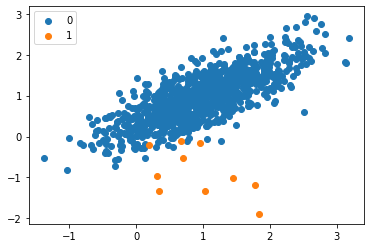

In [71]:
dummy_X, dummy_y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
counter = Counter(dummy_y)
print(counter)
for label, _ in counter.items():
	row_ix = np.where(dummy_y == label)[0]
	plt.scatter(dummy_X[row_ix, 0], dummy_X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

##### Base performance

In [72]:
base_scores_dummy = score_data(dummy_X, dummy_y)
display(base_scores_dummy)

,0,1,accuracy,macro avg,weighted avg
precision,0.995964,0.666667,0.993,0.831315,0.992671
recall,0.996970,0.600000,0.993,0.798485,0.993000
f1-score,0.996466,0.631579,0.993,0.814023,0.992818
support,990.000000,10.000000,0.993,1000.000000,1000.000000


#### Satimage

In [73]:
satimage_df = pd.read_csv('datasets/satimage.csv')
satimage = satimage_df.to_numpy()
satimage_X,satimage_y =satimage[:,:-1],satimage[:,-1]
satimage_y = np.where(satimage_y==4.0,1.0,0.0)

##### Base performance

In [74]:
base_scores_satimage = score_data(satimage_X, satimage_y)
display(base_scores_satimage)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.952067,0.519345,0.906843,0.735706,0.910006
recall,0.944358,0.558400,0.906843,0.751379,0.906843
f1-score,0.948197,0.538165,0.906843,0.743181,0.908341
support,5805.000000,625.000000,0.906843,6430.000000,6430.000000


#### Ecoli

In [75]:
ecoli_df = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data', delim_whitespace=True, header=None)
ecoli_df = ecoli_df.to_numpy()
ecoli_X, ecoli_y = ecoli_df[:,1:-1], ecoli_df[:,-1]
ecoli_y = np.where(ecoli_y == 'om', 1.0, 0.0)

##### Base performance

In [76]:
base_scores_ecoli = score_data(ecoli_X, ecoli_y)
display(base_scores_ecoli)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.977049,0.419355,0.925595,0.698202,0.943853
recall,0.943038,0.650000,0.925595,0.796519,0.925595
f1-score,0.959742,0.509804,0.925595,0.734773,0.932960
support,316.000000,20.000000,0.925595,336.000000,336.000000


### Compare performance of methods

In [77]:
def report(strategy, X, y,visualize=False):
	X_resampled,y_resampled = strategy.fit_resample(X, y)
	resampled_scores_dummy = score_data(X_resampled,y_resampled)
	display(resampled_scores_dummy)
	if visualize:
		visualize_points(X_resampled,y_resampled)

#### BorderlineSMOTE

##### Dummy dataset

,0,1,accuracy,macro avg,weighted avg
precision,0.993939,0.727273,0.988142,0.860606,0.988142
recall,0.993939,0.727273,0.988142,0.860606,0.988142
f1-score,0.993939,0.727273,0.988142,0.860606,0.988142
support,990.000000,22.000000,0.988142,1012.000000,1012.000000


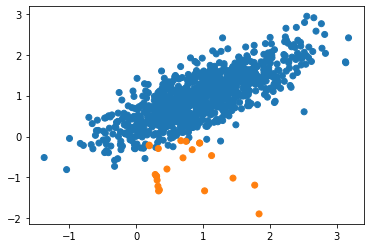

In [78]:
report(BorderlineSMOTE(), dummy_X, dummy_y, True)

##### Satimage

In [79]:
report(BorderlineSMOTE(), satimage_X, satimage_y)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.953141,0.734186,0.909782,0.843664,0.913079
recall,0.935573,0.794615,0.909782,0.865094,0.909782
f1-score,0.944275,0.763207,0.909782,0.853741,0.911145
support,5805.000000,1300.000000,0.909782,7105.000000,7105.000000


##### Ecoli

In [80]:
report(BorderlineSMOTE(), ecoli_X, ecoli_y)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.980456,0.634146,0.939655,0.807301,0.948611
recall,0.952532,0.812500,0.939655,0.882516,0.939655
f1-score,0.966292,0.712329,0.939655,0.839310,0.942939
support,316.000000,32.000000,0.939655,348.000000,348.000000


#### OneSidedSelection

##### Dummy dataset

,0,1,accuracy,macro avg,weighted avg
precision,0.983051,0.666667,0.971429,0.824859,0.970137
recall,0.987234,0.600000,0.971429,0.793617,0.971429
f1-score,0.985138,0.631579,0.971429,0.808358,0.970707
support,235.000000,10.000000,0.971429,245.000000,245.000000


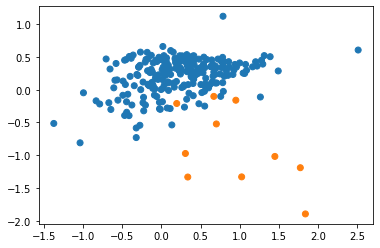

In [81]:
report(OneSidedSelection(), dummy_X, dummy_y, True)

##### Satimage

In [82]:
report(OneSidedSelection(), satimage_X, satimage_y)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.947850,0.524229,0.898282,0.736039,0.902358
recall,0.937632,0.571200,0.898282,0.754416,0.898282
f1-score,0.942713,0.546708,0.898282,0.744710,0.900187
support,5195.000000,625.000000,0.898282,5820.000000,5820.000000


##### Ecoli

In [83]:
report(OneSidedSelection(), ecoli_X, ecoli_y)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.982456,0.600000,0.951613,0.791228,0.957782
recall,0.965517,0.750000,0.951613,0.857759,0.951613
f1-score,0.973913,0.666667,0.951613,0.820290,0.954091
support,290.000000,20.000000,0.951613,310.000000,310.000000


#### SafeLevelSmote

##### Dummy dataset

,0,1,accuracy,macro avg,weighted avg
precision,0.998985,0.760000,0.993069,0.879492,0.994252
recall,0.993939,0.950000,0.993069,0.971970,0.993069
f1-score,0.996456,0.844444,0.993069,0.920450,0.993446
support,990.000000,20.000000,0.993069,1010.000000,1010.000000


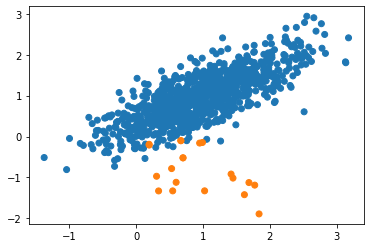

In [84]:
report(SafeLevelSmote(), dummy_X, dummy_y, True)

##### Satimage

In [85]:
report(SafeLevelSmote(), satimage_X, satimage_y)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.966207,0.754811,0.924167,0.860509,0.928752
recall,0.940741,0.847200,0.924167,0.893970,0.924167
f1-score,0.953304,0.798342,0.924167,0.875823,0.925848
support,5805.000000,1250.000000,0.924167,7055.000000,7055.000000


##### Ecoli

In [86]:
report(SafeLevelSmote(), ecoli_X, ecoli_y)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.990066,0.685185,0.94382,0.837626,0.955810
recall,0.946203,0.925000,0.94382,0.935601,0.943820
f1-score,0.967638,0.787234,0.94382,0.877436,0.947367
support,316.000000,40.000000,0.94382,356.000000,356.000000
